In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [25]:
df = pd.read_csv('city_united.csv')
df

,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,...,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,Quality of Life Index
0,Adelaide,Australia,Oceania,6.3095,4.692,3.1365,2.640,1.7765,5.33625,9.399667,...,7.936667,5.1420,8.33075,6.0695,4.5885,4.3410,4.3285,7.8220,5.5310,200.03
1,Raleigh,North Carolina,North America,6.1285,5.610,5.4970,5.157,1.7570,4.78425,8.671000,...,6.677333,7.1165,8.58375,6.5145,4.0620,7.9515,6.6130,7.5620,3.3905,197.30
2,Zurich,Switzerland,Europe,1.4730,1.000,6.2035,3.872,7.7335,5.83950,8.888000,...,7.670333,7.2875,8.64300,6.5520,6.4285,7.2675,4.9655,8.7845,5.4010,194.41
3,Wellington,New Zealand,Oceania,5.1345,5.161,2.4715,1.753,0.8525,6.03975,10.000000,...,8.078333,4.7560,9.60925,5.5055,5.9315,5.1745,4.5990,8.1160,6.3970,193.89
4,Charlotte,North Carolina,North America,5.5490,4.987,6.2480,2.878,3.6790,4.13400,8.671000,...,6.432333,3.6245,8.00925,6.5145,4.0620,6.3870,5.6060,6.7895,1.3115,193.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Delhi,India,Asia,9.7520,9.869,9.8285,9.099,5.6420,3.71225,3.618000,...,3.712667,0.5120,2.20300,5.5565,3.4145,3.5880,5.6830,3.1160,1.1785,69.56
183,Jakarta,Indonesia,Asia,8.6710,8.471,5.6495,6.437,2.4885,3.64000,4.028667,...,4.184000,1.0275,2.48575,4.6575,6.2660,4.4990,8.1460,2.0665,7.2020,68.46
184,Lagos,Nigeria,Africa,7.7670,9.098,6.4335,2.510,1.7480,3.56475,3.255667,...,2.862333,0.0000,1.90725,5.0610,6.2155,1.6340,1.3585,1.4060,3.8245,50.72
185,Manila,Philippines,Asia,8.5955,8.752,4.8050,3.547,2.6345,3.71300,4.592333,...,4.297667,0.0000,1.68300,5.0065,4.3030,4.6080,7.5840,5.5030,4.8255,41.88


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UA_Name                187 non-null    object 
 1   UA_Country             187 non-null    object 
 2   UA_Continent           187 non-null    object 
 3   Housing                187 non-null    float64
 4   Cost of Living         187 non-null    float64
 5   Startups               187 non-null    float64
 6   Venture Capital        187 non-null    float64
 7   Travel Connectivity    187 non-null    float64
 8   Commute                187 non-null    float64
 9   Business Freedom       187 non-null    float64
 10  Safety                 187 non-null    float64
 11  Healthcare             187 non-null    float64
 12  Education              187 non-null    float64
 13  Environmental Quality  187 non-null    float64
 14  Economy                187 non-null    float64
 15  Taxati

In [27]:
x = df.drop('Quality of Life Index', axis = 1)

In [28]:
y = df['Quality of Life Index']


In [29]:
X_train, X_test, y_train, y_test = train_test_split(x, y,  test_size=0.33, random_state=19)

In [31]:
columns = x.columns

In [32]:
cat = ['UA_Name', 'UA_Country', 'UA_Continent']

In [33]:
num = [col for col in columns if col not in cat]

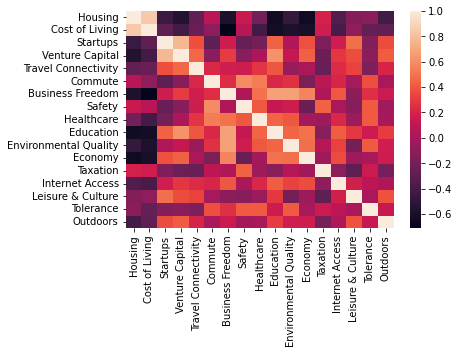

In [34]:
sns.heatmap(X_train[num].corr(method='spearman'));

In [35]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_train[cat])

features_name = enc.get_feature_names_out(cat)
X_train[features_name] =  enc.transform(X_train[cat]).toarray()
X_train = X_train.drop(cat, axis=1)

X_test[features_name] = enc.transform(X_test[cat]).toarray()
X_test = X_test.drop(cat, axis=1)

C:\Users\София\AppData\Local\Temp\ipykernel_11224\1774646502.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train[features_name] =  enc.transform(X_train[cat]).toarray()
C:\Users\София\AppData\Local\Temp\ipykernel_11224\1774646502.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train[features_name] =  enc.transform(X_train[cat]).toarray()
C:\Users\София\AppData\Local\Temp\ipykernel_11224\1774646502.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many ti

In [36]:
scaler = StandardScaler()
X_train[num] = scaler.fit_transform(X_train[num])
X_test[num] = scaler.transform(X_test[num])

In [37]:
model = LinearRegression()
model.fit(X_train, y_train)
print(f"R2 на train: {model.score(X_train, y_train)}")
print(f"R2 на test: {model.score(X_test, y_test)}")

R2 на train: 0.9854818998621555
R2 на test: -3.052282714009415e+23


In [38]:
import eli5
from eli5.sklearn import PermutationImportance

In [39]:
reg = LinearRegression().fit(X_train, y_train)

In [40]:
perm = PermutationImportance(reg, random_state=42).fit(X_test, y_test)
perm

PermutationImportance(estimator=LinearRegression(), random_state=42)

In [41]:
eli5.show_weights(perm, feature_names=list(X_test.columns))

Weight,Feature
316309429459314576195584.0000 ± 187142213529998502920192.0000,Safety
280229391424787119603712.0000 ± 87444174764612949901312.0000,Startups
188721132100510111760384.0000 ± 45264275657981817782272.0000,Venture Capital
188444044324821111144448.0000 ± 42057678379688954691584.0000,Healthcare
144565901484272723689472.0000 ± 152682577599374584446976.0000,Internet Access
134751018346174463606784.0000 ± 36172447282985449816064.0000,Environmental Quality
124461153765245660954624.0000 ± 55151756965570135719936.0000,Travel Connectivity
109972643207362792914944.0000 ± 54746322832788792803328.0000,Leisure & Culture
81406890775643372388352.0000 ± 25620403773468156362752.0000,Education
64090747871579670052864.0000 ± 42192140778321133699072.0000,Cost of Living


In [42]:
pca = PCA(whiten=True)
pca.fit(X_train)
variance = pd.DataFrame(pca.explained_variance_ratio_)
np.cumsum(pca.explained_variance_ratio_)

array([0.28361706, 0.43700128, 0.54764854, 0.61374173, 0.67686812,
       0.72017169, 0.75141905, 0.78092285, 0.80696765, 0.82837945,
       0.84848443, 0.86294   , 0.87592963, 0.88647276, 0.89503076,
       0.90303571, 0.90805212, 0.91221399, 0.91612952, 0.91908817,
       0.92147662, 0.92368798, 0.9256055 , 0.92743567, 0.92914036,
       0.93076191, 0.93236314, 0.93377829, 0.93515862, 0.93647462,
       0.93776941, 0.93901588, 0.94022669, 0.9413837 , 0.94250205,
       0.94360945, 0.94469226, 0.94573882, 0.9467646 , 0.94773171,
       0.9486826 , 0.9495799 , 0.9504601 , 0.95127395, 0.9520878 ,
       0.95290164, 0.95371549, 0.95452934, 0.95534319, 0.95615703,
       0.95697088, 0.95778473, 0.95859857, 0.95941242, 0.96022627,
       0.96104012, 0.96185396, 0.96266781, 0.96348166, 0.9642955 ,
       0.96510935, 0.9659232 , 0.96673705, 0.96755089, 0.96836474,
       0.96917859, 0.96999243, 0.97080628, 0.97162013, 0.97243398,
       0.97324782, 0.97406167, 0.97487552, 0.97568936, 0.97650

In [43]:
np.where(np.cumsum(pca.explained_variance_ratio_) == 1.)

(array([], dtype=int64),)

In [44]:
pca = PCA(n_components=30, whiten=True)
pca = pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [45]:
model = LinearRegression()
model.fit(X_train, y_train)
print(f"R2 на train: {model.score(X_train, y_train)}")
print(f"R2 на test: {model.score(X_test, y_test)}")

R2 на train: 0.8887317432246106
R2 на test: 0.7894451007717405
